In [13]:
from google.colab import files
uploaded = files.upload()


Saving flood_dataset_classification.csv to flood_dataset_classification (1).csv


In [15]:
import os
print(os.listdir())


['.config', 'flood_dataset_classification.csv', 'flood_dataset_classification (1).csv', 'sample_data']


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [17]:
df = pd.read_csv("flood_dataset_classification.csv")
df.head()


,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,52.6717,-0.2995,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.0,1
1,0,35.6897,139.6920,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.0,1
2,0,39.9050,116.3910,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.0,1
3,0,23.1288,113.2590,0.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.0,1
4,0,39.1467,117.2060,0.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.0,1


In [18]:
print(df.columns)
print(df.shape)
print(df.info())



Index(['Disaster Type', 'Latitude', 'Longitude', 'Total Deaths',
       'Total Affected', 'duration', 'time', 'Rainfall', 'Elevation', 'Slope',
       'distance', 'occured'],
      dtype='object')
(6237, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   Latitude        6237 non-null   float64
 2   Longitude       6237 non-null   float64
 3   Total Deaths    6237 non-null   float64
 4   Total Affected  6237 non-null   float64
 5   duration        6237 non-null   float64
 6   time            6237 non-null   int64  
 7   Rainfall        6237 non-null   float64
 8   Elevation       6237 non-null   float64
 9   Slope           6237 non-null   float64
 10  distance        6237 non-null   float64
 11  occured         6237 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 584.8 KB
Non

In [19]:
df.describe()


,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
count,6237.000000,6237.000000,6237.000000,6.237000e+03,6.237000e+03,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6.237000e+03,6237.000000
mean,0.773930,18.767296,25.577775,3.092211e+03,8.047540e+05,25.897066,1994.058041,1200.677851,604.385537,7.169169,5.440781e+03,0.672118
std,1.257769,23.205920,75.478904,7.709807e+04,7.847980e+06,89.617806,20.522141,1164.591241,855.309741,8.954785,8.607790e+04,0.469479
min,0.000000,-53.162569,-175.273869,0.000000e+00,0.000000e+00,0.000000,1900.000000,0.547090,-29.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,4.868178,-43.415278,0.000000e+00,5.000000e+02,0.000000,1987.000000,489.270857,42.000000,1.854334,0.000000e+00,0.000000
50%,0.000000,22.704752,30.488437,8.000000e+00,5.381000e+03,0.000000,2000.000000,1029.113686,239.000000,3.704792,0.000000e+00,1.000000
75%,2.000000,37.963000,92.340000,4.300000e+01,6.001600e+04,0.000000,2008.000000,1524.737477,839.000000,8.656136,0.000000e+00,1.000000
max,4.000000,69.968735,179.847745,3.700000e+06,3.000000e+08,660.000000,2016.000000,23751.949287,6796.000000,65.991348,1.390229e+06,1.000000


In [20]:
X = df.drop(["occured", "Total Deaths", "Total Affected"], axis=1)
y = df["occured"]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [22]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [23]:
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       865

    accuracy                           1.00      1248
   macro avg       1.00      1.00      1.00      1248
weighted avg       1.00      1.00      1.00      1248



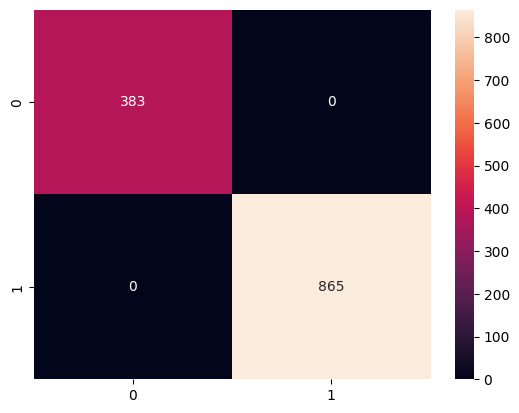

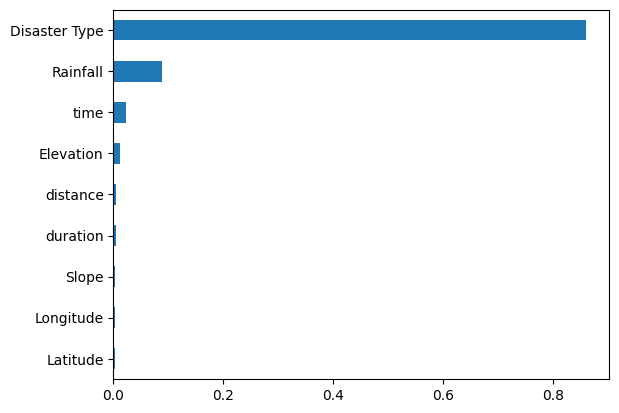

In [25]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()


In [26]:
joblib.dump(model, "flood_model.pkl")
from google.colab import files
files.download("flood_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
def predict_flood(data):
    prediction = model.predict([data])[0]

    if prediction == 1:
        return "Flood Likely"
    else:
        return "No Flood"


In [28]:
prob = model.predict_proba(X_test)

print(prob[:5])



[[1.96745161e-03 9.98032548e-01]
 [2.63157895e-03 9.97368421e-01]
 [9.91489362e-01 8.51063830e-03]
 [6.21118012e-05 9.99937888e-01]
 [1.00000000e+00 0.00000000e+00]]


In [29]:
def risk_level(prob):
    if prob < 0.3:
        return "Low"
    elif prob < 0.7:
        return "Medium"
    else:
        return "High"


In [31]:
for p in prob[:10]:
    print("Prob:", round(p[1],3),
          " Risk:", risk_level(p[1]))





Prob: 0.998  Risk: High
Prob: 0.997  Risk: High
Prob: 0.009  Risk: Low
Prob: 1.0  Risk: High
Prob: 0.0  Risk: Low
Prob: 0.0  Risk: Low
Prob: 0.996  Risk: High
Prob: 0.992  Risk: High
Prob: 0.997  Risk: High
Prob: 0.014  Risk: Low


In [33]:
!pip install folium



In [34]:
import folium
from folium.plugins import HeatMap



In [48]:
india_heat_data = []

for i, p in enumerate(prob):
    lat = X_test.iloc[i]["Latitude"]
    lon = X_test.iloc[i]["Longitude"]
    flood_prob = p[1]

    if 8 <= lat <= 37 and 68 <= lon <= 97:
        india_heat_data.append([lat, lon, flood_prob])





In [49]:
m = folium.Map(
    location=[22.5, 78.9],
    zoom_start=5
)



In [50]:
HeatMap(
    india_heat_data,
    radius=8,
    blur=10,
    max_zoom=7
).add_to(m)

m